# Online Portfolio Selection: Momentum

In this notebook, we will walk through the momentum strategies implemented in the online portfolio selection module.

In particular, we will take a look at
1. Exponential Gradient
    - Multiplicative Update
    - Gradient Projection
    - Expectation Maximization
2. Follow the Leader
    - Follow the Regulariazed Leader

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlfinlab.online_portfolio_selection import *

## Import Data

We will use the ETF data included in the mlfinlab library for analysis. This includes 23 ETF's with closing prices from 2008 to 2016

In [2]:
stock_prices = pd.read_csv('../tests/test_data/stock_prices.csv', parse_dates=True, index_col='Date')
stock_prices = stock_prices.dropna(axis=1)

In [3]:
stock_prices.head()

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,49.273335,35.389999,106.639999,52.919998,78.220001,87.629997,37.939999,47.759998,41.299999,79.500000,...,42.090000,51.173328,55.983330,74.529999,67.309998,144.929993,94.379997,77.360001,101.400002,130.630005
2008-01-03,49.716667,35.290001,107.000000,53.119999,78.349998,87.809998,37.919998,48.060001,42.049999,80.440002,...,42.029999,51.293331,55.599998,74.800003,67.500000,144.860001,94.250000,77.459999,101.519997,130.740005
2008-01-04,48.223331,34.599998,106.970001,51.759998,76.570000,88.040001,36.990002,46.919998,40.779999,77.500000,...,42.349998,49.849998,54.536671,72.980003,65.769997,141.309998,94.269997,77.550003,101.650002,128.169998
2008-01-07,48.576668,34.630001,106.949997,51.439999,76.650002,88.199997,37.259998,47.060001,40.220001,77.199997,...,43.230000,50.416672,56.116669,72.949997,65.650002,141.190002,94.680000,77.570000,101.720001,128.059998
2008-01-08,48.200001,34.389999,107.029999,51.320000,76.220001,88.389999,36.970001,46.400002,39.599998,75.849998,...,43.240002,49.566669,55.326672,72.400002,65.360001,138.910004,94.570000,77.650002,101.739998,125.849998


## Momentum

Momentum strategies are implemented with the belief that if an asset is increasing, it will continue to increase. If the asset has been decreasing, momentum also assumes that the asset will continue to decrease in price.

## 1. Exponential Gradient

Exponential Gradient strategies focus on the following optimization problem that tracks the best performing stock with a certain learning rate and also regularizes the objective function to balance out the portfolio.

$b_{t+1} = \underset{b \in \Delta_m}{\arg\max} \: \eta \log b \cdot x_t - R(b,b_t)$

### 1.1 Multiplicative Update 

If we adopt relative entropy as the regularization factor, we can use log's first order taylor expansion to create an update rule to be the following multiplicative one.

$b_{t+1} = b_t \cdot \exp \left( \eta \frac{x_t}{b_t \cdot x_t} \right)$

### 1.2 Gradient Projection

Instead of relative entropy, gradient projection adopts an L2-regularization term for the optimization equation.

$b_{t+1} = b_t + \eta \cdot \left( \frac{x_t}{b_t \cdot x_t} - \frac{1}{m} \sum_{j=1}^{m} \frac{x_t}{b_t \cdot x_t} \right)$

### 1.3 Expectation Maximization

Expectation Maximization uses a $\chi^2$ regularization term

$b_{t+1} = b_t \cdot \left( \eta \cdot \left( \frac{x_t}{b_t \cdot x_t} - 1 \right) + 1 \right)$

Each of these update rules can be called using the EG() with different update rules with the default being the multiplciative update rule. Learning rates can also be adjusted but the default value will be 0.05 for now.

- Multiplicative Update: 'MU'
- Gradient Projection: 'GP'
- Expectation Maximization: 'EM'

In [4]:
multiplicative_update = EG(eta=0.05,update_rule='MU')
gradient_projection = EG(eta=0.05,update_rule='GP')
expectation_maximization = EG(eta=0.05,update_rule='GP')
multiplicative_update.allocate(stock_prices)
gradient_projection.allocate(stock_prices)
expectation_maximization.allocate(stock_prices)

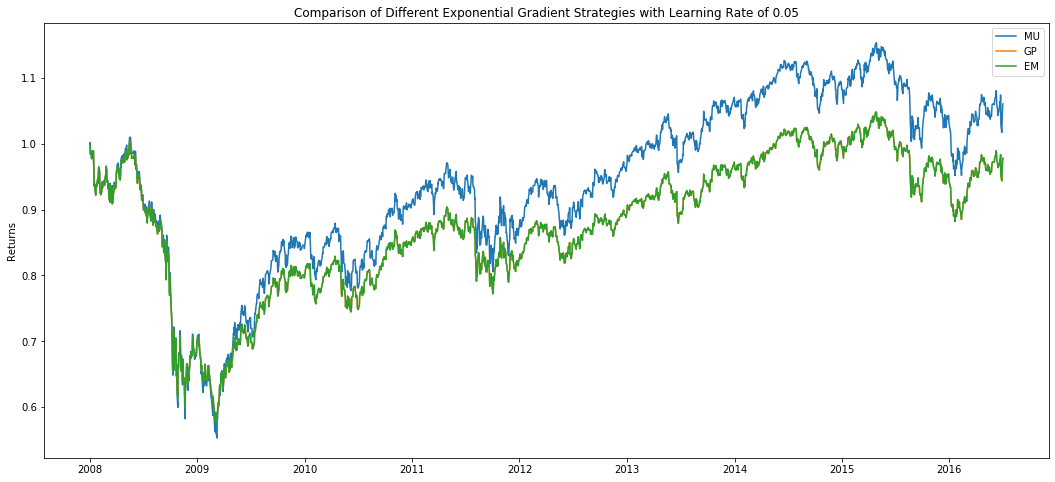

In [5]:
plt.figure(figsize=(18,8));
plt.plot(multiplicative_update.portfolio_return, label = 'MU');
plt.plot(gradient_projection.portfolio_return, label = 'GP');
plt.plot(expectation_maximization.portfolio_return, label = 'EM');
plt.title('Comparison of Different Exponential Gradient Strategies with Learning Rate of 0.05')
plt.ylabel('Returns')
plt.legend();

Interestingly, the gradient projection method and expectation maximization method returns a strikingly similar graph, so the orange color that represents GP cannot be seen.

The returns for the EG strategies are still disappointing, so we will look to increase the learning rate for our EG strategy.

In [6]:
new_multiplicative_update = EG(eta=0.5,update_rule='MU')
new_gradient_projection = EG(eta=0.5,update_rule='GP')
new_expectation_maximization = EG(eta=0.5,update_rule='GP')
new_multiplicative_update.allocate(stock_prices)
new_gradient_projection.allocate(stock_prices)
new_expectation_maximization.allocate(stock_prices)

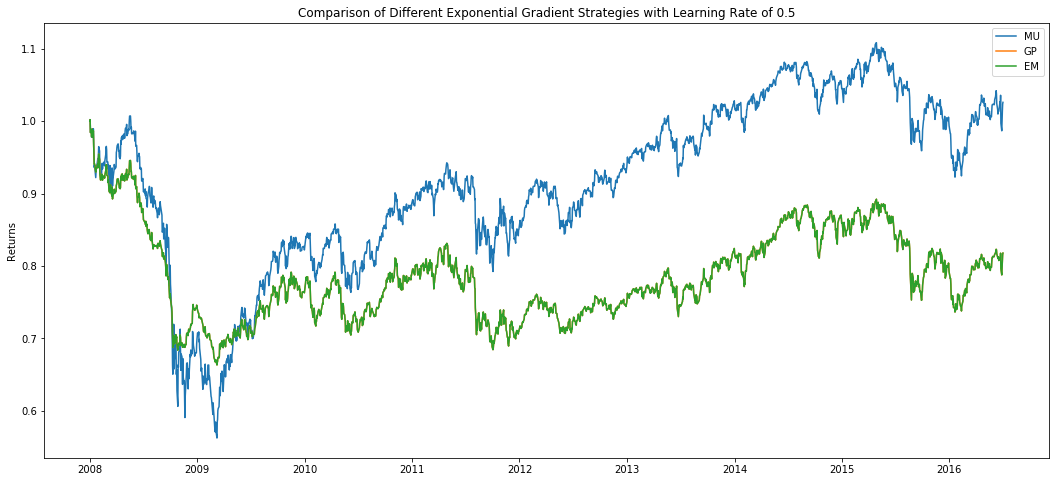

In [7]:
plt.figure(figsize=(18,8));
plt.plot(new_multiplicative_update.portfolio_return, label = 'MU');
plt.plot(new_gradient_projection.portfolio_return, label = 'GP');
plt.plot(new_expectation_maximization.portfolio_return, label = 'EM');
plt.title('Comparison of Different Exponential Gradient Strategies with Learning Rate of 0.5')
plt.ylabel('Returns')
plt.legend();

From the initial analysis, multiplicative update rules continue to return better returns than the other two methods. However, overall the returns are still disappointing as we continue to stay at almost original portfolio value.

We wil now see how learning rate affects the EG strategy for the multiplicative update method.

In [ ]:
plt.figure(figsize=(18,8));
eta_values = [0.001,0.01,0.1,0.2,0.5,0.9]
for e in eta_values:
    strat = EG(eta=e, update_rule='MU')
    strat.allocate(stock_prices)
    plt.plot(strat.portfolio_return, label = str(e));
plt.title('Comparison of Multiplicative Update Exponential Gradient Strategies with Different Learning Rate')
plt.ylabel('Returns')
plt.legend();

It seems to be the case that a learning rate of 0.01 returns the highest returns, but if you look at the graph closely, this is very similar to the Buy and Hold graph of a uniform weighted strategy. With a lower learning rate, our portfolio weight will not deviate too much from the original initiation. Therefore, this graph seems to resemble the market trend of the given assets.

## 2. Follow the Leader

Follow the leader is similar to EG strategy in that it follows the best performing asset. However instead of a single asset, FTL follows the BCRP until the previous time period.

$b_{t+1} = b^{\bf{\star}}_t = \underset{b \in \Delta_m}{\arg\max} \overset{t}{\underset{\tau=1}{\sum}} \: \log(b \cdot x_{\tau})$

### 2.1 Follow the Regularized Leader

Follow the Regularized Leader is very similar to the FTL strategy but is different by a regularization factor to prevent the portfolio from making drastic changes.

$b_{t+1} = \underset{b \in \Delta_m}{\arg\max} \overset{t}{\underset{\tau=1}{\sum}} \: \log(b \cdot x_{\tau}) - \frac{\beta}{2}R(b)$

FTL can be called with FTL(), and FTRL can be called with FTRL().

In [9]:
ftl = FTL()
ftrl = FTRL(beta=0.01)
ftl.allocate(stock_prices)
ftrl.allocate(stock_prices)

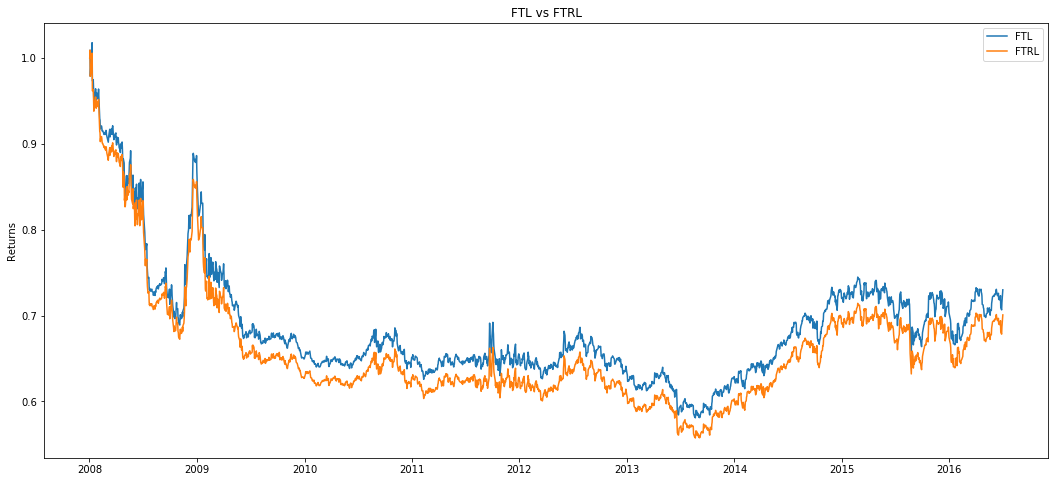

In [10]:
plt.figure(figsize=(18,8));
plt.plot(ftl.portfolio_return, label = 'FTL');
plt.plot(ftrl.portfolio_return, label = 'FTRL');
plt.title('FTL vs FTRL')
plt.ylabel('Returns')
plt.legend();

FTL and FTRL returns are very low compare to other strategies. FTRL consistently lags behind FTL as the regularization term doesn't mitigate the risks but instead seems to produce results that are just under the changes of FTL. There was a spike near 2009 that worked really well for FTL, so it is possible that FTL works in a short term crash.

We will attempt to see how different values of beta affect FTRL.

In [ ]:
plt.figure(figsize=(18,8));
beta_values = [0.001,0.01,0.1,0.2,0.5,0.9]
for b in beta_values:
    strat = FTRL(beta=b)
    strat.allocate(stock_prices)
    plt.plot(strat.portfolio_return, label = str(b));
plt.title('Comparison of Follow the Regularized Leader Strategies with Different Beta Value')
plt.ylabel('Returns')
plt.legend();

At least initially, a higher beta or regularization value seems to perform better, but it does not capture the increase of value in 2014. A low beta value represents a direct tracking of the previous term's BCRP. From this we can come to a conclusion that directly tracking last time period's portfolio weights does not always return the best results for our portfolio.